In [1]:
import os
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import RDPaths
from rdkit.Chem import Draw

In [2]:
from dgl.data.chem import utils
from dgl.model_zoo.chem import pretrain
from dgl.model_zoo.chem.dgmg import MoleculeEnv
import torch
from torch.utils.data import DataLoader
from torch.optim import Adam
import copy

In [3]:
mols = Chem.SDMolSupplier(f"{RDPaths.RDDocsDir}/Book/data/cdk2.sdf")
molgs = [utils.mol_to_complete_graph(mol) for mol in mols]

In [4]:
model = pretrain.load_pretrained('DGMG_ChEMBL_canonical')

Pretrained model loaded


In [5]:
model1 = copy.deepcopy(model)
model2 = copy.deepcopy(model)
model3 = copy.deepcopy(model)

In [6]:
#!wget https://raw.githubusercontent.com/dmlc/dgl/master/examples/pytorch/model_zoo/chem/generative_models/dgmg/utils.py
#!wget https://raw.githubusercontent.com/dmlc/dgl/master/examples/pytorch/model_zoo/chem/generative_models/dgmg/sascorer.py

In [7]:
from utils import MoleculeDataset

In [8]:
params = model1.parameters()
for idx, param in enumerate(params):
    param.requires_grad = False

params_ = model1.choose_dest_agent.parameters()
for idx, param in enumerate(params_):
    param.requires_grad = True
    
params = model2.parameters()
for idx, param in enumerate(params):
    param.requires_grad = False

params_ = model2.choose_dest_agent.parameters()
for idx, param in enumerate(params_):
    param.requires_grad = True

params = model3.parameters()
for idx, param in enumerate(params):
    param.requires_grad = False

params_ = model3.choose_dest_agent.parameters()
for idx, param in enumerate(params_):
    param.requires_grad = True


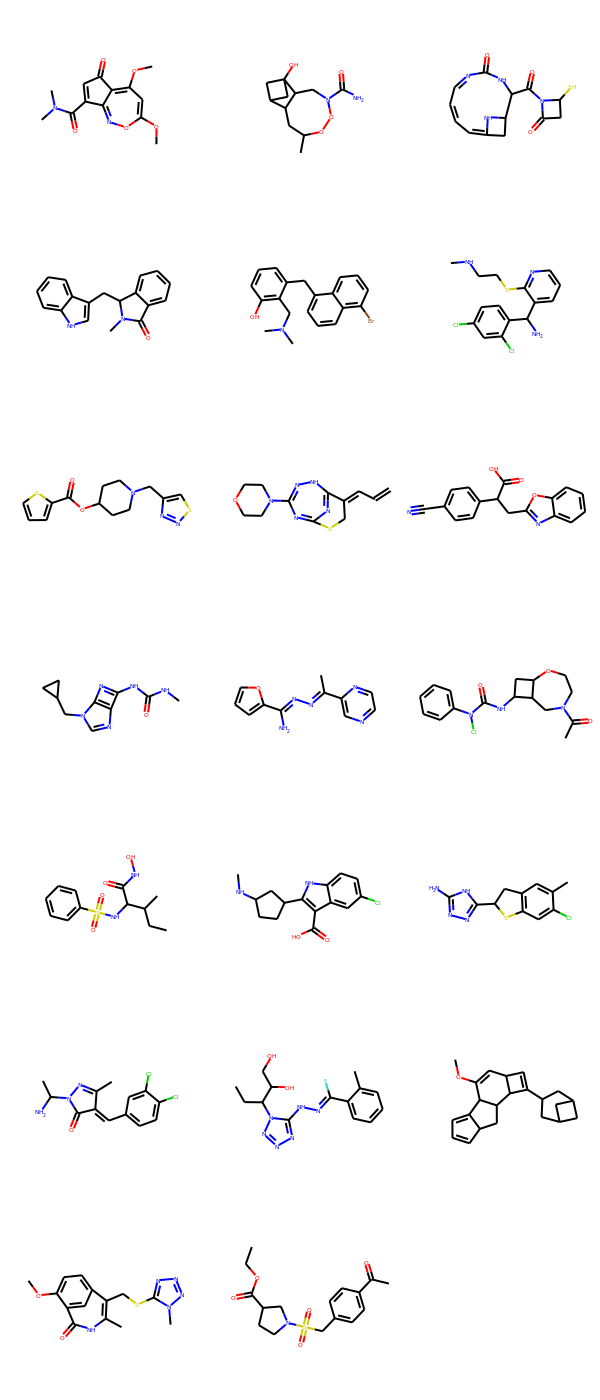

In [9]:
genmols = []
i = 0
while i < 20:
    SMILES = model(rdkit_mol=True)
    if Chem.MolFromSmiles(SMILES) is not None:
        genmols.append(Chem.MolFromSmiles(SMILES))
        i += 1
Draw.MolsToGridImage(genmols)

In [10]:
atom_types = ['O', 'Cl', 'C', 'S', 'F', 'Br', 'N']
bond_types = [Chem.rdchem.BondType.SINGLE,
                               Chem.rdchem.BondType.DOUBLE,
                               Chem.rdchem.BondType.TRIPLE]
env = MoleculeEnv(atom_types, bond_types)

In [11]:
from utils import Subset
from utils import Optimizer

In [12]:
subs1 = Subset([Chem.MolToSmiles(mol) for mol in mols], 'canonical', env)
subs2 = Subset(['C1NCOC1' for _ in range(10)], 'canonical', env)
subs3 = Subset(['CNCOCC' for _ in range(10)], 'canonical', env)

In [13]:
loader1  = DataLoader(subs1, 1)
loader2  = DataLoader(subs2, 1)
loader3  = DataLoader(subs3, 1)

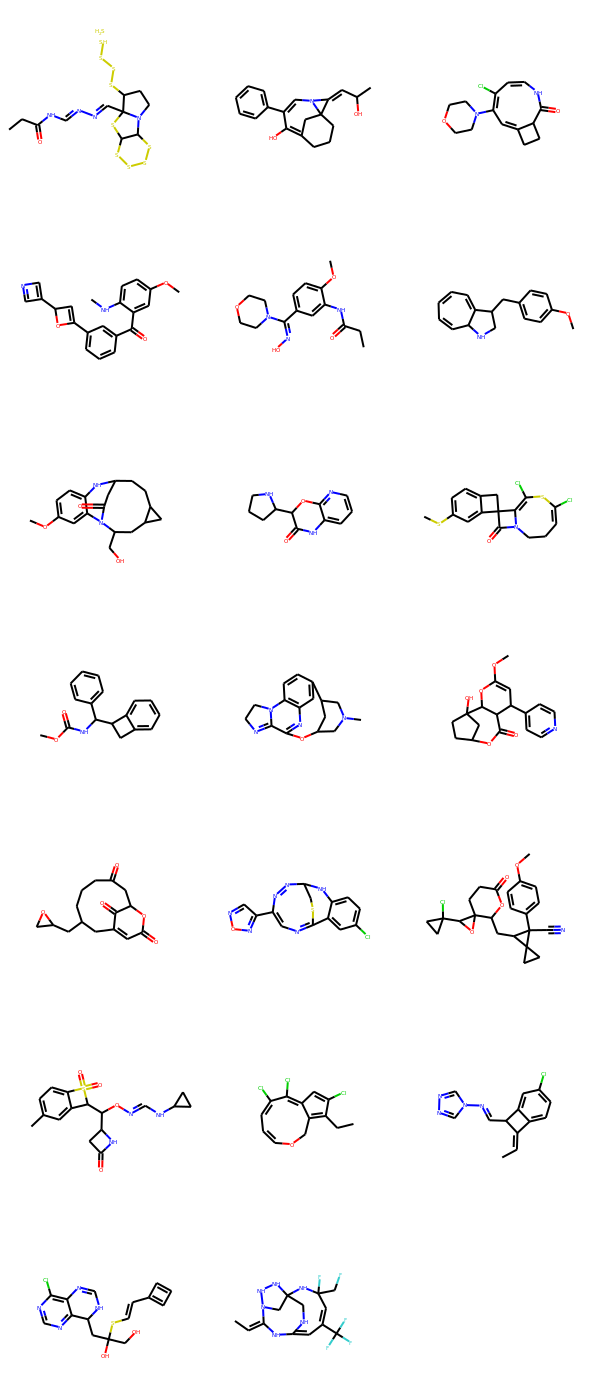

In [22]:
optimizer = Optimizer(0.1, Adam(model1.parameters(), 0.1))
model1.train()
for i in range(10):
    for data in loader1:
        optimizer.zero_grad()
        logp = model1(data, compute_log_prob=True)
        loss_averaged = - logp
        optimizer.backward_and_step(loss_averaged)
model1.eval()
genmols = []
i = 0
while i < 20:
    SMILES = model1(rdkit_mol=True)
    if Chem.MolFromSmiles(SMILES) is not None:
        genmols.append(Chem.MolFromSmiles(SMILES))
        i += 1
from rdkit.Chem import Draw
Draw.MolsToGridImage(genmols)

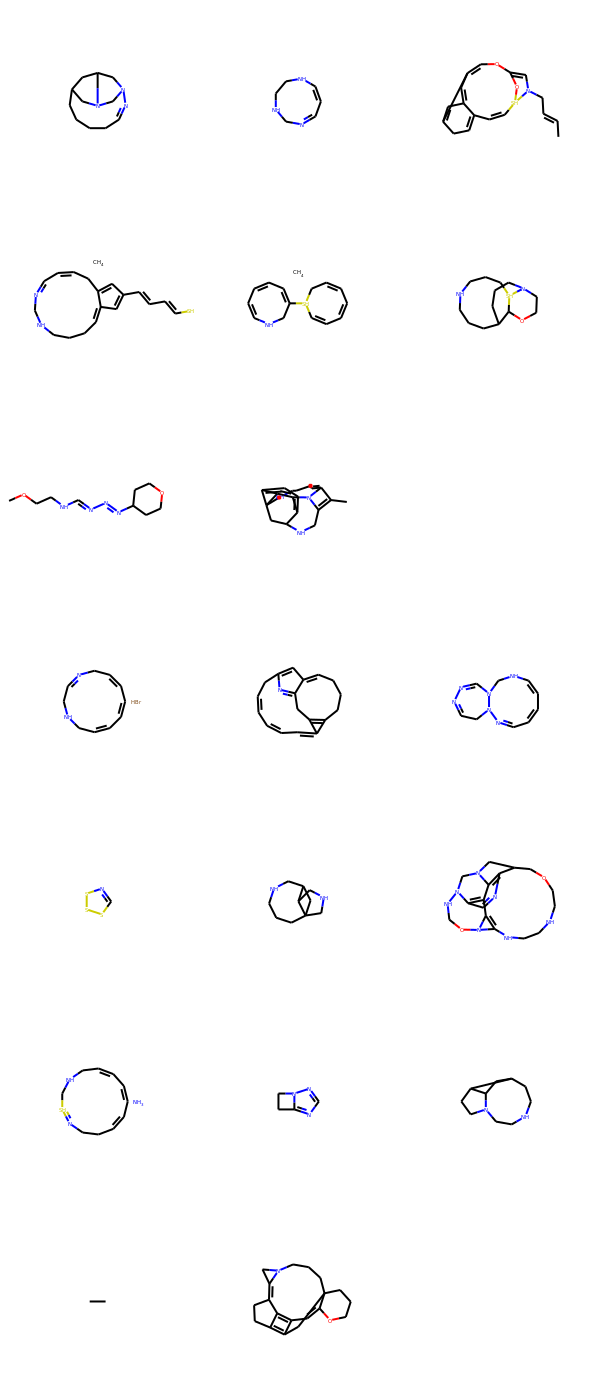

In [25]:
optimizer = Optimizer(0.1, Adam(model2.parameters(), 0.1))
model2.train()
for i in range(10):
    for data in loader2:
        optimizer.zero_grad()
        logp = model2(data, compute_log_prob=True)
        loss_averaged = - logp
        optimizer.backward_and_step(loss_averaged)
model2.eval()
genmols = []
i = 0
while i < 20:
    SMILES = model2(rdkit_mol=True)
    if Chem.MolFromSmiles(SMILES) is not None:
        genmols.append(Chem.MolFromSmiles(SMILES))
        i += 1
from rdkit.Chem import Draw
Draw.MolsToGridImage(genmols)

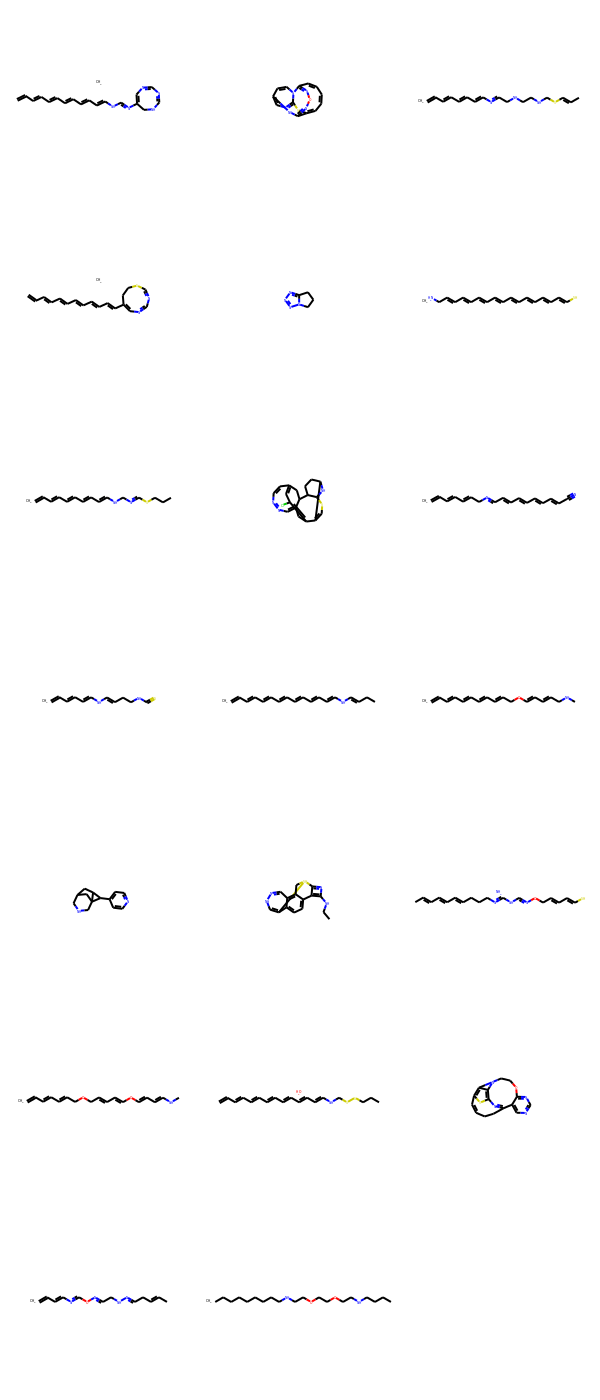

In [26]:
optimizer = Optimizer(0.1, Adam(model3.parameters(), 0.1))
model3.train()
for i in range(10):
    for data in loader3:
        optimizer.zero_grad()
        logp = model3(data, compute_log_prob=True)
        loss_averaged = - logp
        optimizer.backward_and_step(loss_averaged)
model3.eval()
genmols = []
i = 0
while i < 20:
    SMILES = model3(rdkit_mol=True)
    if Chem.MolFromSmiles(SMILES) is not None:
        genmols.append(Chem.MolFromSmiles(SMILES))
        i += 1
from rdkit.Chem import Draw
Draw.MolsToGridImage(genmols)